# ML #4 "Создание и обучение первой нейронной сети."

1) Подключение библиотек

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import random

from tensorflow import keras
from keras import layers
from keras.models import Sequential
import pathlib
from typing import List, Tuple, Union

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


2) Загрузка и извлечение датасета


In [3]:
dataset_url: str = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir: pathlib.Path = pathlib.Path(tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)).with_suffix('')

3) Проверка датасета

In [4]:
image_count: int = len(list(dataset_dir.glob("*/*.jpg")))
print(image_count)

3670


4) Подготовка данных и модели

In [5]:
batch_size = 32
img_widht = 180
img_height = 180
random_seed = random.randint(0, 9999)

def create_image_dataset(
    dataset_dir: pathlib.Path,
    subset: str,
    image_size: Tuple[int, int],
    batch_size: int
) -> tf.data.Dataset:
  return tf.keras.utils.image_dataset_from_directory(
      dataset_dir,
      validation_split=0.2,
      subset=subset,
      seed=random_seed,
      image_size=image_size,
      batch_size=batch_size
  )

train_ds_original: tf.data.Dataset = create_image_dataset(dataset_dir, 'training', (img_height, img_widht), batch_size)
val_ds_original: tf.data.Dataset = create_image_dataset(dataset_dir, 'validation', (img_height, img_widht), batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


5) Подготовака данных с кэшированием и предварительной загрузкой

In [6]:
class_names: list[str] = train_ds_original.class_names
print(f'Class names: {class_names}')

AUTOTUNE: int = tf.data.AUTOTUNE
train_ds = train_ds_original.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds_original.cache().prefetch(buffer_size=AUTOTUNE)

Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


6) Создание модели нейронной сети

In [9]:
num_classes: int = len(class_names)
model: keras.Sequential = Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_widht, 3)),
    layers.Conv2D(16, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

7) Компиляция модели

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

8) Обучение модели

In [11]:
epochs: int = 10
history: keras.callbacks.History = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 125s 1s/step - loss: 1.5339 - accuracy: 0.4315 - val_loss: 1.0741 - val_accuracy: 0.5858
Epoch 2/10
92/92 [==============================] - 120s 1s/step - loss: 0.9979 - accuracy: 0.6035 - val_loss: 0.9929 - val_accuracy: 0.6090
Epoch 3/10
92/92 [==============================] - 115s 1s/step - loss: 0.8218 - accuracy: 0.6703 - val_loss: 1.1628 - val_accuracy: 0.5381
Epoch 4/10
92/92 [==============================] - 117s 1s/step - loss: 0.5663 - accuracy: 0.7909 - val_loss: 1.0435 - val_accuracy: 0.6144
Epoch 5/10
92/92 [==============================] - 118s 1s/step - loss: 0.2924 - accuracy: 0.8971 - val_loss: 1.4281 - val_accuracy: 0.6076
Epoch 6/10
92/92 [==============================] - 122s 1s/step - loss: 0.1576 - accuracy: 0.9503 - val_loss: 1.4750 - val_accuracy: 0.6158
Epoch 7/10
92/92 [==============================] - 116s 1s/step - loss: 0.0857 - accuracy: 0.9782 - val_loss: 1.7261 - val_accuracy: 0.5872
Epoch 8/10
92

9) Получение истории обучения модели

In [12]:
print(history.history)

{'loss': [1.5338674783706665, 0.9979201555252075, 0.8218234181404114, 0.5662547945976257, 0.2924041450023651, 0.1575804203748703, 0.08568694442510605, 0.0702550932765007, 0.020648855715990067, 0.016252007335424423], 'accuracy': [0.43153950572013855, 0.6035422086715698, 0.6702997088432312, 0.7908719182014465, 0.8971389532089233, 0.9502725005149841, 0.9782016277313232, 0.9812670350074768, 0.9938691854476929, 0.9976158142089844], 'val_loss': [1.0740525722503662, 0.9929144978523254, 1.1628477573394775, 1.0435441732406616, 1.4280643463134766, 1.4749646186828613, 1.726056456565857, 1.7955435514450073, 2.17507266998291, 2.320639133453369], 'val_accuracy': [0.5858310461044312, 0.608991801738739, 0.5381471514701843, 0.6144413948059082, 0.6076294183731079, 0.6158038377761841, 0.587193489074707, 0.6076294183731079, 0.5899182558059692, 0.6103542447090149]}


10) Визуализация данных

<function matplotlib.pyplot.show(close=None, block=None)>

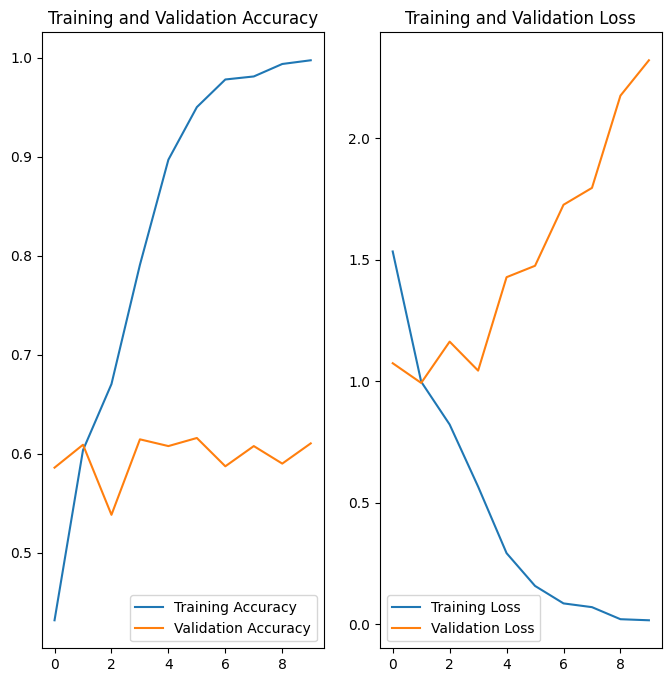

In [13]:
acc: list[float] = history.history['accuracy']
val_acc: list[float] = history.history['val_accuracy']
loss: list[float] = history.history['loss']
val_loss: list[float] = history.history['val_loss']
epochs_range: range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show

# ML #5 Дообучение нейронной сети

1) Дообучение модели


In [15]:
epochs: int = 20
history: keras.callbacks.History = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 141s 2s/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 2.4303 - val_accuracy: 0.6035
Epoch 2/20
92/92 [==============================] - 114s 1s/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 2.5948 - val_accuracy: 0.6076
Epoch 3/20
92/92 [==============================] - 113s 1s/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 2.4747 - val_accuracy: 0.6131
Epoch 4/20
92/92 [==============================] - 113s 1s/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 2.5569 - val_accuracy: 0.6063
Epoch 5/20
92/92 [==============================] - 117s 1s/step - loss: 0.0051 - accuracy: 0.9993 - val_loss: 2.4299 - val_accuracy: 0.6076
Epoch 6/20
92/92 [==============================] - 114s 1s/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 2.5319 - val_accuracy: 0.6035
Epoch 7/20
92/92 [==============================] - 114s 1s/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 2.5437 - val_accuracy: 0.6144
Epoch 8/20
92

2) Визуализация результатов обучения нейронной сети

<function matplotlib.pyplot.show(close=None, block=None)>

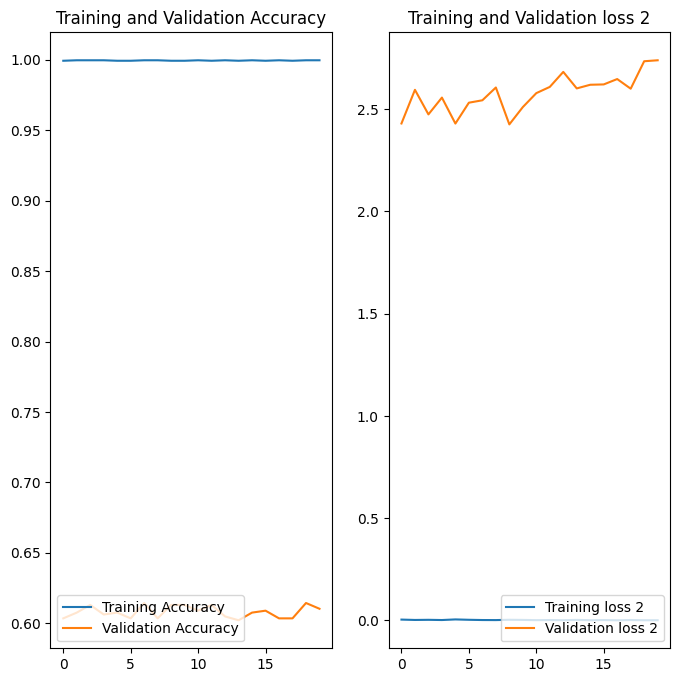

In [16]:
acc: list[float] = history.history['accuracy']
val_acc: list[float] = history.history['val_accuracy']
loss: list[float] = history.history['loss']
val_loss: list[float] = history.history['val_loss']
epochs_range: list[int] = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss 2')
plt.plot(epochs_range, val_loss, label='Validation loss 2')
plt.legend(loc='lower right')
plt.title('Training and Validation loss 2')
plt.show

3) Инференс модели

In [20]:
redrose_url: str = "https://i.pinimg.com/736x/d6/5a/27/d65a2741117472739679b7304341d29c.jpg"
redrose_path: str = tf.keras.utils.get_file('Red_rose', origin=redrose_url)

img: PIL.JpegImagePlugin.JpegImageFile = tf.keras.utils.load_img(
    redrose_path, target_size=(img_height, img_widht)
)
img_array: np.ndarray = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions: np.ndarray = model.predict(img_array)
score: tf.Tensor = tf.nn.softmax(predictions[0])

print('На изображении  {} ({:.2f}% вероятность)'.format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))

1/1 [==============================] - 0s 39ms/step
На изображении  roses (100.00% вероятность)


In [21]:
sunflower_url: str = "https://i.pinimg.com/736x/4e/91/28/4e91285e75e2869e860936fc3f0e2ada.jpg"
sunflower_path: str = tf.keras.utils.get_file('Yellow_sunflower', origin=sunflower_url)

img: PIL.JpegImagePlugin.JpegImageFile = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_widht)
)
img_array: np.ndarray = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions: np.ndarray = model.predict(img_array)
score: tf.Tensor = tf.nn.softmax(predictions[0])

print('На изображении  {} ({:.2f}% вероятность)'.format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))

1/1 [==============================] - 0s 34ms/step
На изображении  sunflowers (97.83% вероятность)


In [22]:
dandelion_url: str = "https://i.pinimg.com/736x/67/59/10/675910f9c54f462f99e77173e2c1b24a.jpg"
dandelion_path: str = tf.keras.utils.get_file('Yellow_dandelion', origin=dandelion_url)

img: PIL.JpegImagePlugin.JpegImageFile = tf.keras.utils.load_img(
    dandelion_path, target_size=(img_height, img_widht)
)
img_array: np.ndarray = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions: np.ndarray = model.predict(img_array)
score: tf.Tensor = tf.nn.softmax(predictions[0])

print('На изображении  {} ({:.2f}% вероятность)'.format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))

1/1 [==============================] - 0s 37ms/step
На изображении  dandelion (97.51% вероятность)


4) Сохранение модели локально

In [23]:
from google.colab import files

model_file_name: str = "my_flowers_model.h5"
model.save(model_file_name)
files.download(model_file_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>